<a href="https://colab.research.google.com/github/alanmejiaa/Aprendizale-Automatico/blob/main/Tarea%20%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 4**


*   Aplicar filtro mediante SelectKBest.
*   Aplica los modelos de selección de características cuidando los supuestos de cada modelo.
*   Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema.
*   Con base en tu investigación, determina las características más relevantes de tu conjunto de datos.
*   Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Sacaremos la relacion de (_28) con las Unidades, con el costo y numero de producto.
df = pd.read_csv("skudata.csv")
y = df[['_28']] #que es el precio
x = df[['L13UnitsTotal','AVG_BASE_COST58','SKU']]

In [4]:
# se clasificamos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_val = f_regression(x, y)
f_val
df_result = pd.DataFrame(f_val[0], index=x.columns)
df_result.columns = ['f_val']
df_result.sort_values('f_val', inplace = True, ascending = False)
df_result

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f_val
AVG_BASE_COST58,10461.390199
L13UnitsTotal,4.891963
SKU,2.966586


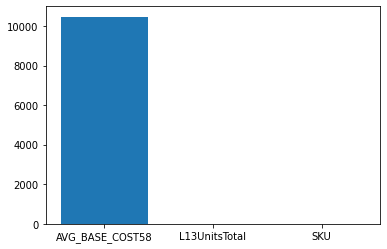

In [6]:
plt.figure()
plt.bar(df_result.index, df_result.f_val)
plt.show()

La variable del costo es la variable con mas relacion lineal

# **Selección de caracteristícas**

Este conjuntos de datos cuenta con las variables e información necesaria para saber si un persona tiene enfermedad cardiaca o no. 

Tomare la variable Edad (Age) como la variable de respuesta, ya que me interesa saber que si a una mayor edad son mayores las probabilidades de tener una enfermedad cardiaca.

Esto es identificando patrones en los datos donde podamos observar mayor influencia en nuestra variable de respuesta y asi mismo saber que variables regresoras son las que mas afectan y con esto podamos determinar si la persona o paciente tiene enfermedades cardiacas.

# **Umbral de varianza**

Este metodo consisiste en descartar las variables que tengan baja varianza, esto significa que no transmiten mucha informacion al modelo.

In [7]:
# Normalizamos variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled


,L13UnitsTotal,AVG_BASE_COST58,SKU
0,1.000000,0.029221,0.294678
1,0.800885,0.000812,0.395545
2,0.584839,0.045455,0.460056
3,0.465678,0.001623,0.395548
4,0.400846,0.021916,0.374406
...,...,...,...
295,0.000243,0.069805,0.354332
296,0.000115,0.000000,0.592265
297,0.000115,0.060877,0.213104
298,0.000040,0.009740,0.711773


In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.01227013, 0.02132646, 0.06209494])

In [10]:
# Le agregamos la varianza
df_result['variance'] = selector.variances_
df_result.sort_values('variance', ascending = False, inplace = True)
df_result

,f_val,variance
SKU,2.966586,0.062095
L13UnitsTotal,4.891963,0.021326
AVG_BASE_COST58,10461.390199,0.012270


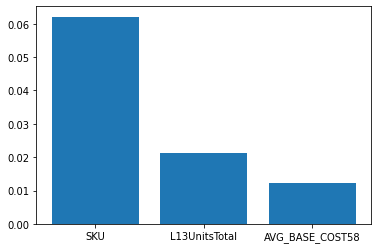

In [11]:
plt.figure()
plt.bar(df_result.index, df_result.variance)
plt.show()

Para que el modelo elimine las variables con poca varianza se tiene que tener un nivel por debajo de 0.2. 


#  **Valor R de correlación**

Indica el nivel de correlación de nuestra variable de respuesta con las variables regresoras.

In [12]:
from sklearn.feature_selection import r_regression

In [13]:
r_val = r_regression(x, y)
r_val

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.127086  ,  0.98605439,  0.09928173])

In [16]:
df_result['r_val'] = r_val
colors = []
for v in df_result['r_val']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')
df_result

,f_val,variance,r_val
SKU,2.966586,0.062095,-0.127086
L13UnitsTotal,4.891963,0.021326,0.986054
AVG_BASE_COST58,10461.390199,0.012270,0.099282


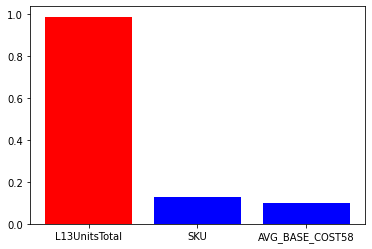

In [18]:
df_result['r_value_abs'] = df_result['r_val'].abs()
df_result.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_result.index, df_result.r_value_abs, color = colors)
plt.show()

*   Trabajare mi base de datos, para tener mas variables numericas y que sea mas util en estos nuevos ejercicios, pero no queria no perder el puntaje de esta tarea, replicare las tareas cuando ajuste la base.